<a href="https://www.kaggle.com/code/edashnr/spotify-vs-youtube?scriptVersionId=209232228" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# SPOTİFY vs YOUTUBE Veri Analizi

![](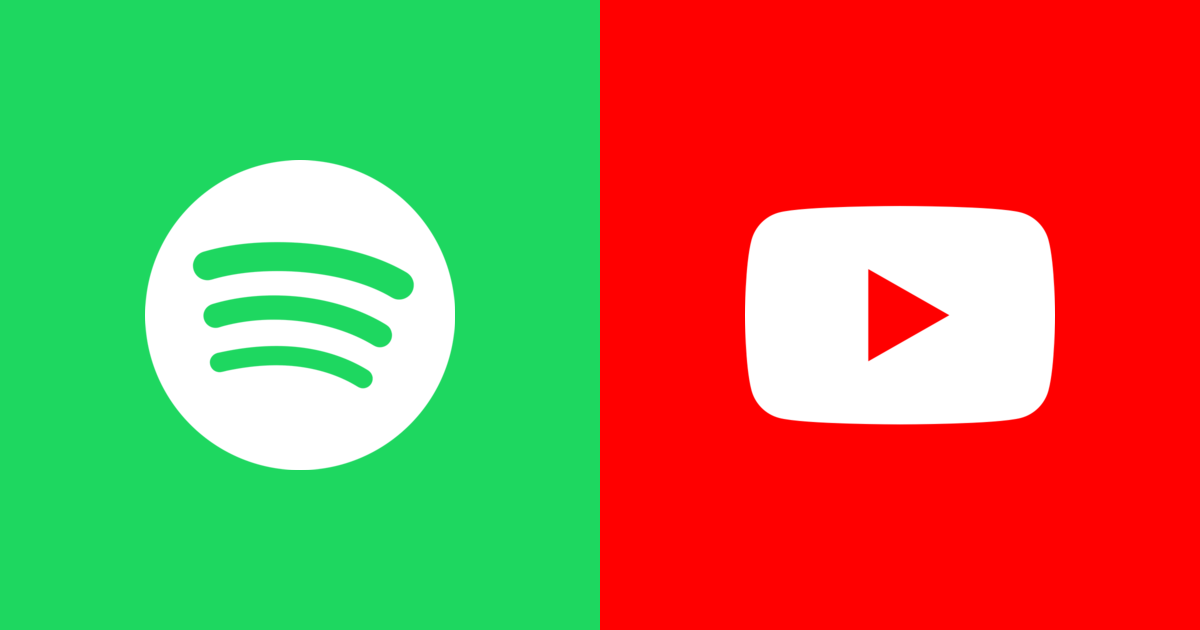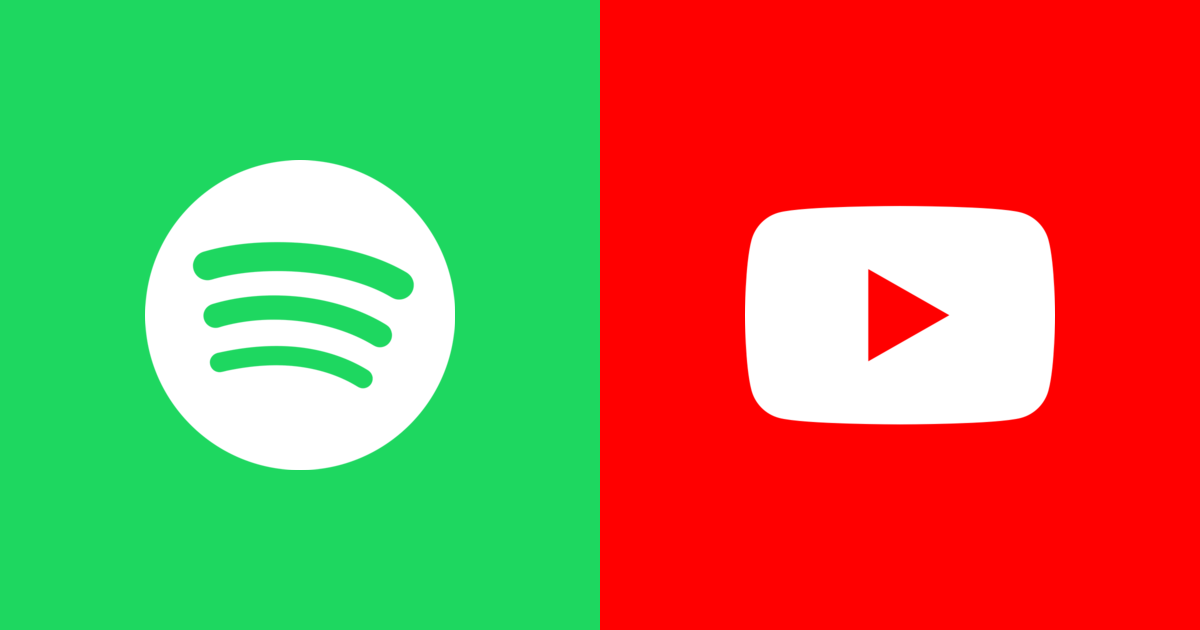)


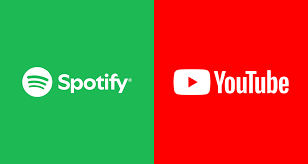
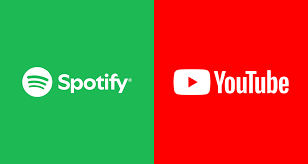
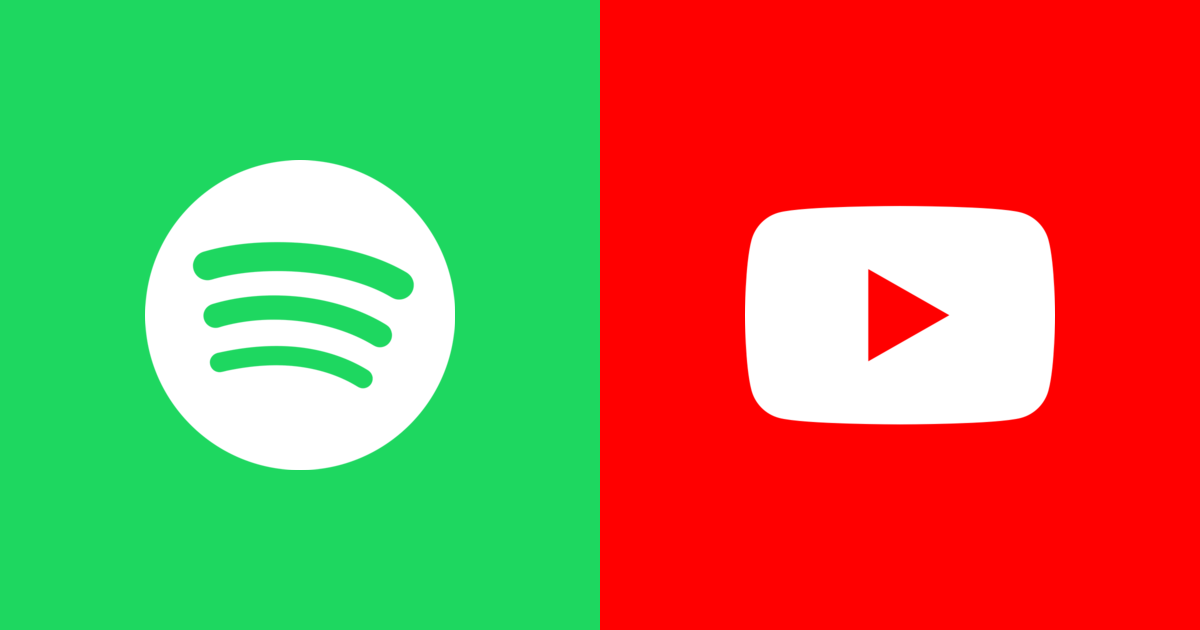
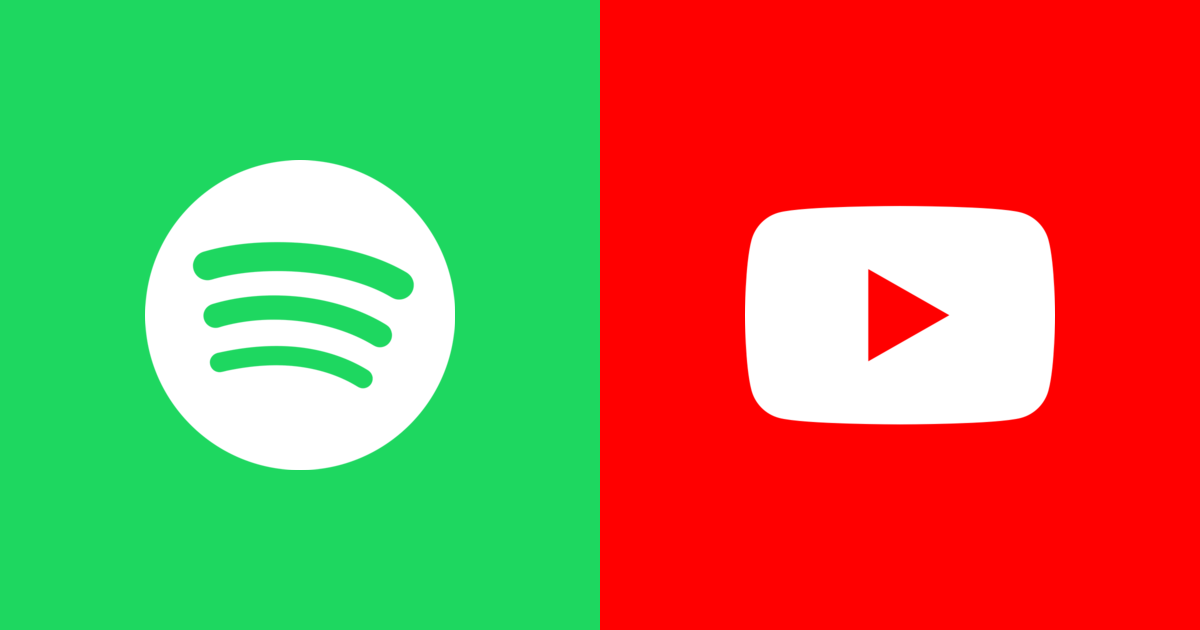

# 0. Veri Setinin Hazırlanması
**Veri Seti ve Adresi**

Spotify ve Youtube

[https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube](http://)

In [1]:

# Kullanacağımız kütüphaneleri yükleyelim.

# Pandas ve NumPy
import pandas as pd
import numpy as np

# Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Veri setini notebook içerisine dahil edelim.

df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/spotify-and-youtube/Spotify_Youtube.csv")
df = df_.copy()

In [3]:
# Veri setinin ilk 3 gözlemini görelim.
df.head(n = 3)

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07


NaN değerler var mı kontrol edelim.

In [4]:
df.isna().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [5]:
df.isna().sum().sum()

5404

Burda eksik değerler olduğunu görüyoruz ama bunlara ek olarak biraz daha NaN değer ekleyelim.

In [6]:
import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.02,
                              seed: random = 42) -> pd.DataFrame:
    """Bu fonksiyon, bir DataFrame üzerinde belirli bir oranla 
    rastgele hücrelere eksik değer (NaN) ekler.
    
Parametreler

dataframe (pd.DataFrame):
Üzerinde çalışılacak DataFrame (tablo) parametresidir.

missing_rate (float):
Eksik değerlerin oranını ifade eder. Örneğin:
0.05 → Veri setinin %5'ine eksik değer eklenecek.
Varsayılan değer 0.05 olarak ayarlanmıştır.

seed (int):
Rastgelelik için sabit bir değer kullanılır.
Bu, sonuçların her çalıştırmada aynı olmasını sağlar.
Varsayılan değer 42 olarak belirlenmiştir.

    """
     # DataFrame'in Kopyalanması:
    #Orijinal DataFrame'i değiştirmemek için bir kopyası alınır.
    df_missing = dataframe.copy()

    # Eksik Veri Sayısının Belirlenmesi:
    #DataFrame'in toplam hücre sayısı (df_size) hesaplanır.
   #Belirtilen oran (missing_rate) ile eksik değer sayısı (num_missing) belirlenir.
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
     # Rastgelelik Ayarı:
    #Rastgelelik ayarlanır. Böylece her çalıştırmada aynı hücreler seçilir.
    if seed:
        random.seed(seed)

    # Rastgele Hücrelerin NaN Yapılması:
    #Eksik değerlerin eklenmesi için:
      #Rastgele satır (row_idx) ve sütun (col_idx) indeksleri seçilir.
      #Belirtilen hücreye eksik değer (np.nan) atanır.
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    #Sonuç Dönüşü:
    #Eksik değer eklenmiş DataFrame döndürülür.
    return df_missing

Yeni oluşturduğumuz NaN degerler ile şimdiğki toplam NaN değerlere bakalım.

In [7]:
df.isna().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [8]:
df.isna().sum().sum()

5404

Veri setindeki satır ve sütun sayılarını .shape kullanarak görebiliriz

In [9]:
df.shape # -> (satır, sütun)

(20718, 28)

Veri setindeki değişkenlerin isimlerine erişmek için df.columns kullanıyoruz.

In [10]:
# Veri setindeki kolonları yazdırır.
print(list(df.columns), '\n')

# len() fonksiyonu ile toplam kolon sayısına erişiyoruz.
print(f"Veri seti içerisinde toplam {len(df.columns)} kolon vardır.\n")

# Çoğu zaman kullandığımız attribute ve fonksiyonların sonuçlarının hangi tipte veri döndürdüğünü gözlemlemek kod üzerinde hakimiyet kurmak için önemlidir.
print(f"df.columns'un döndüğü veri tipi: {type(df.columns)}\n")

['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes', 'Comments', 'Description', 'Licensed', 'official_video', 'Stream'] 

Veri seti içerisinde toplam 28 kolon vardır.

df.columns'un döndüğü veri tipi: <class 'pandas.core.indexes.base.Index'>



# 2.Genel Veriyi Tanımlama ve Keşfetme

**Veri Türleri ve Sütunların İncelenmesi**


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

Sadece elimizdeki değişkenleri görmek ve tiplerini görüntülemek için dtypes kullanıyoruz.

In [12]:
df.dtypes

Unnamed: 0            int64
Artist               object
Url_spotify          object
Track                object
Album                object
Album_type           object
Uri                  object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Url_youtube          object
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Description          object
Licensed             object
official_video       object
Stream              float64
dtype: object

Elimizdeki veri setinde kategorik ve numerik özellikler birlikte bulunmakta. Bu özellikleri ayırmak ve farklı değişken listelerinde kullanmak bizim için faydalı olabilir, özellikle kolon bazlı işlemler yapmak istersek bu listeleri bir filtre olarak kullanabiliriz.

In [13]:
categorical_features = []
numerical_features = []

for col in df.columns:
    if (df[col].dtype == "object") or (df[col].dtype == "categorical"):
        categorical_features.append(col)
        #Type i object olan kolonlar categorical_features'a eklenecek.
    else:
        numerical_features.append(col)
        #Type i categorical olan kolonlar numerical_features'a eklenecek.

In [14]:
categorical_features, numerical_features

(['Artist',
  'Url_spotify',
  'Track',
  'Album',
  'Album_type',
  'Uri',
  'Url_youtube',
  'Title',
  'Channel',
  'Description',
  'Licensed',
  'official_video'],
 ['Unnamed: 0',
  'Danceability',
  'Energy',
  'Key',
  'Loudness',
  'Speechiness',
  'Acousticness',
  'Instrumentalness',
  'Liveness',
  'Valence',
  'Tempo',
  'Duration_ms',
  'Views',
  'Likes',
  'Comments',
  'Stream'])

**Temel İstatistikler**

Bu, sayısal sütunların ortalama, medyan, minimum ve maksimum değerlerini gösterir.

In [15]:
df.describe()

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20718.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,10358.500000,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,5980.915774,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,5179.250000,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,10358.500000,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,15537.750000,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


Veri setinde bulunan albüm türlerini keşfedelim.

In [16]:
album_type_count = df['Album_type'].value_counts()
print(album_type_count)

Album_type
album          14926
single          5004
compilation      788
Name: count, dtype: int64


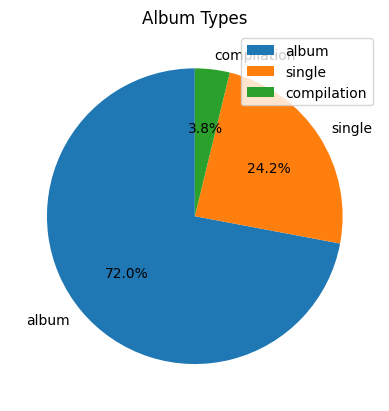

In [17]:
# Pasta grafiği oluşturalım
labels = album_type_count.index.tolist()
sizes = album_type_count.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Album Types')
plt.legend(labels, loc='best')

plt.show()

**Yukarıdaki pastagrafiğindenn aşağıdaki sonuçları çıkarabiliriz.**

Albüm türü en popüler olanıdır: Veriler, albüm türünün diğer türlere (derleme ve single) kıyasla önemli ölçüde daha yüksek izlenme sayısına sahip olduğunu göstermektedi

r.Single'lar derlemelerden daha popüler: Her ne kadar albümler en popüler olsa da veriler, single'ların derlemelere kıyasla daha fazla izlenme oluşturduğunu da gösteriyor. Bu durum, dinleyicilerin farklı sanatçıların şarkı derlemeleri yerine tek tek şarkıları tercih ettiğini gösteriyor olabilir.

# 3.Eksik Veri Analizi

**Eksik Değer Analizi** 

Eksik değerlerin dağılımını görmek, temizleme veya doldurma gerekliliğini belirlemek için kullanıyoruz.

In [18]:
df.isnull().sum()
#Biz başta %5 lik bir NoN değer girmiştik,ona göre hesaplandı.

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [19]:
df.isnull().sum().sum()
#Toplam Değiştirilen Sayısı

5404

In [20]:
# Eksik olmayan değerlerin sayısı
df.notnull().sum()

Unnamed: 0          20718
Artist              20718
Url_spotify         20718
Track               20718
Album               20718
Album_type          20718
Uri                 20718
Danceability        20716
Energy              20716
Key                 20716
Loudness            20716
Speechiness         20716
Acousticness        20716
Instrumentalness    20716
Liveness            20716
Valence             20716
Tempo               20716
Duration_ms         20716
Url_youtube         20248
Title               20248
Channel             20248
Views               20248
Likes               20177
Comments            20149
Description         19842
Licensed            20248
official_video      20248
Stream              20142
dtype: int64

In [21]:
# Veri setinde toplam kaç adet eksik gözlem var, kaç adet eksik olmayan gözlem var görelim.
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan, {df.isnull().sum().sum()} eksik gözlem var.")

Veri seti içerisinde toplam 574700 adet eksik olmayan, 5404 eksik gözlem var.


In [22]:
# Veri setinde en az bir gözlemi eksik olan kayıtlara da ulaşabiliriz.
df[df.isnull().any(axis = 1)]

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
30,30,Metallica,https://open.spotify.com/artist/2ye2Wgw4gimLv2...,Enter Sandman (Remastered),Metallica (Remastered),album,spotify:track:3VqHuw0wFlIHcIPWkhIbdQ,0.566,0.834,6.0,...,https://www.youtube.com/watch?v=CD-E-LDc384,Metallica: Enter Sandman (Official Music Video),Metallica,5.735537e+08,2828795.0,81335.0,Metallica's official music video for “Enter Sa...,True,True,NaN
31,31,Metallica,https://open.spotify.com/artist/2ye2Wgw4gimLv2...,Nothing Else Matters (Remastered),Metallica (Remastered),album,spotify:track:2CtemffYhT0DJWcT1XW047,0.547,0.394,4.0,...,https://www.youtube.com/watch?v=tAGnKpE4NCI,Metallica: Nothing Else Matters (Official Musi...,Metallica,1.209806e+09,5127599.0,135946.0,Metallica's official music video for “Nothing ...,True,True,NaN
32,32,Metallica,https://open.spotify.com/artist/2ye2Wgw4gimLv2...,Master of Puppets (Remastered),Master of Puppets (Remastered Deluxe Box Set),album,spotify:track:54bm2e3tk8cliUz3VSdCPZ,0.539,0.828,4.0,...,https://www.youtube.com/watch?v=E0ozmU9cJDg,Master of Puppets (Remastered),Metallica - Topic,2.076291e+07,293409.0,1703.0,Provided to YouTube by Blackened Recordings\n\...,True,True,NaN
34,34,Metallica,https://open.spotify.com/artist/2ye2Wgw4gimLv2...,The Unforgiven (Remastered),Metallica (Remastered),album,spotify:track:7lwvxYumAEo10lzAplRGXM,0.531,0.583,7.0,...,https://www.youtube.com/watch?v=Ckom3gf57Yw,Metallica - The Unforgiven (Official Music Video),Warner Records Vault,4.261257e+08,1781690.0,46392.0,“The Unforgiven” by Metallica from the album M...,False,False,NaN
35,35,Metallica,https://open.spotify.com/artist/2ye2Wgw4gimLv2...,One (Remastered),...And Justice for All (Remastered Deluxe Box ...,album,spotify:track:0LAcM6I7ijW4VVW0aytl1t,0.438,0.687,7.0,...,https://www.youtube.com/watch?v=oTS5cPTqFWM,Metallica - One (Official Music Video) [Remast...,"No Music, No Life !",5.240000e+02,18.0,1.0,"""One"" from the album ""...And Justice For All"" ...",False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20703,20703,ThxSoMch,https://open.spotify.com/artist/4MvZhE1iuzttco...,Imperfect Girl - Sped Up,Imperfect Girl,single,spotify:track:721XeX1GeQGv9n8O1u4zrD,0.715,0.885,6.0,...,https://www.youtube.com/watch?v=12BPjL7kQH4,Imperfect Girl (Sped Up),ThxSoMch - Topic,1.076260e+05,2759.0,29.0,Provided to YouTube by DistroKid\n\nImperfect ...,True,True,NaN
20704,20704,ThxSoMch,https://open.spotify.com/artist/4MvZhE1iuzttco...,Like I'm British,Like I'm British,single,spotify:track:7EuUtsdmSQDArQEQ1t4oF8,0.727,0.574,10.0,...,https://www.youtube.com/watch?v=E5jQZlZ1k_Y,Like I'm British (feat. Yxng LJ) [Prod. Slntrx],ThxSoMch,4.036000e+04,1458.0,14.0,NaN,True,True,NaN
20705,20705,ThxSoMch,https://open.spotify.com/artist/4MvZhE1iuzttco...,ONLY NEED MY BABY! (SMOAGT),ONLY NEED MY BABY! (SMOAGT),single,spotify:track:2lIPicEikuMfrsD5cP3Xyp,0.704,0.444,8.0,...,https://www.youtube.com/watch?v=DQrSfZh2R-s,ONLY NEED MY BABY! (SMOAGT) [Prod. Eem Triplin],ThxSoMch,3.363600e+04,1282.0,20.0,NaN,True,True,NaN
20706,20706,ThxSoMch,https://open.spotify.com/artist/4MvZhE1iuzttco...,HOW YOU ALWAYS LOOK SO GOOD?,HOW YOU ALWAYS LOOK SO GOOD?,single,spotify:track:7hnC8qa5dgwXOgbVt3E7Ze,0.653,0.631,11.0,...,https://www.youtube.com/watch?v=jJGCyPgMr9I,HOW YOU ALWAYS LOOK SO GOOD?,ThxSoMch - Topic,1.086790e+05,3209.0,36.0,Provided to YouTube by DistroKid\n\nHOW YOU AL...,True,True,NaN


In [23]:
# Hiç eksik gözlemi bulunmayan kayıtları getirelim.
df[df.notnull().all(axis = 1)][:5]

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


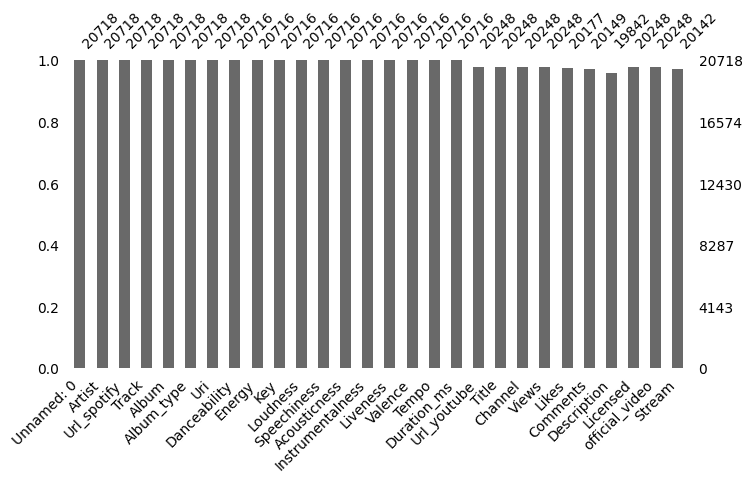

In [24]:
import missingno as msno

msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 10);

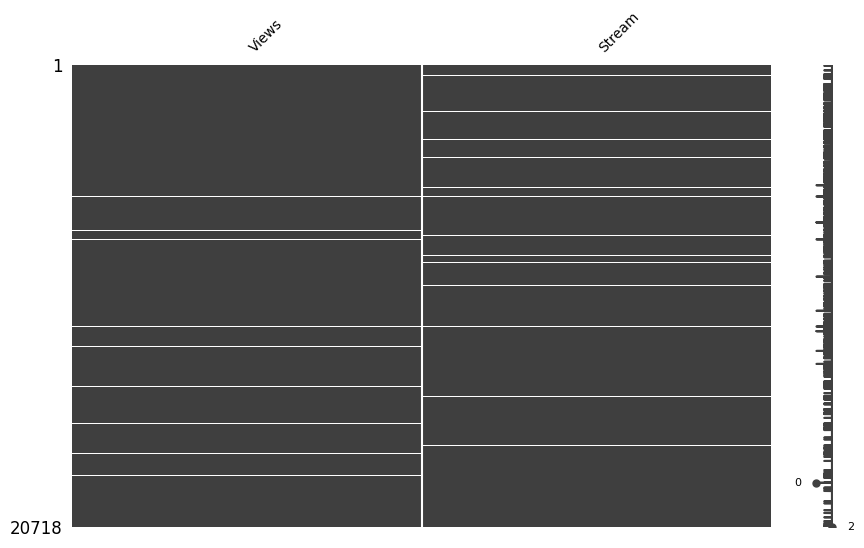

In [25]:
# msno.matrix(), değişkenlerde bulunan eksik değerlerin ilişkili olup olmadığını görsel yolla tespit etmek için kullanıyoruz.
msno.matrix(df = df[['Views', 'Stream']],
            figsize = (10, 6),
            fontsize = 10);

# 4.Spotify Verileri Analizi¶**Müzikal Özellikler Arasında Korelasyon:**


Hangi özelliklerin birbiriyle ilişkili olduğunu görmek için:

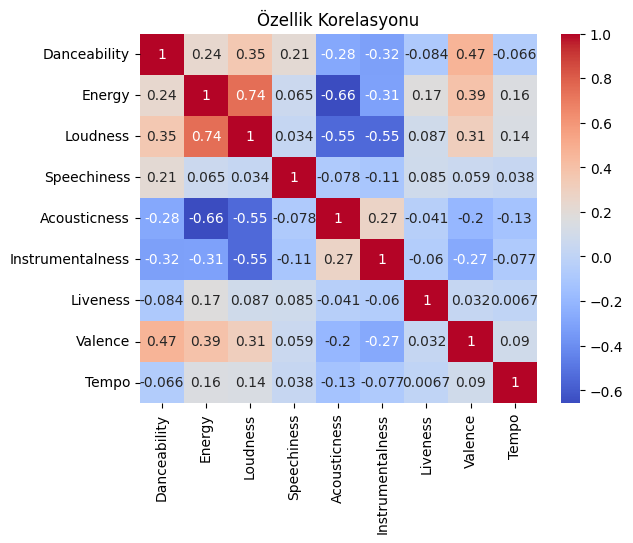

In [26]:
# Verisetinde korelasyon analizi yapmak için belirli özellikleri seçiyoruz
correlation_matrix = df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 
                         'Acousticness', 'Instrumentalness', 'Liveness', 
                         'Valence', 'Tempo']].corr()

# Korelasyon matrisini görselleştirmek için bir ısı haritası oluşturuyoruz
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# Grafiğe bir başlık ekliyoruz
plt.title("Özellik Korelasyonu")
plt.show()

Oluşan ısı haritasına göre Tempo ve Danceability arasında güçlü bir pozitif korelasyon gözlemledik.

**Popülerlik ve Müzikal Özellikler:**

Hangi tür şarkılar daha popüler?:

Text(0, 0.5, 'Ortalama Akışlar')

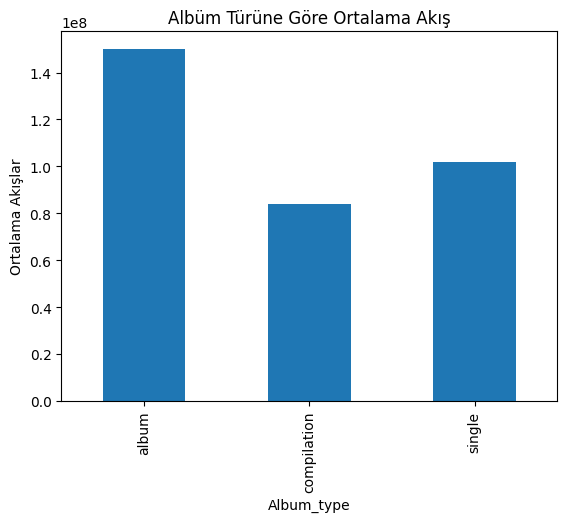

In [27]:
# Verisetini 'Album_type' sütununa göre gruplandırıp, 'Stream' sütununun ortalama değerlerini hesaplıyoruz
 # Ortalama stream değerlerini çubuk grafik olarak çiziyoruz
df.groupby('Album_type')['Stream'].mean().plot(kind='bar')

# Grafiğe bir başlık ekliyoruz
plt.title("Albüm Türüne Göre Ortalama Akış")
plt.ylabel("Ortalama Akışlar")

Buradan albümlerin daha çok akışta olduğunu görüyoruz.

Spotify platformunda şarkıları en çok beğeni alan ilk 10 sanatçıya bakalım.

In [28]:
#"Sanatçı" sütununu dizin olarak yapma
df_artist = df.set_index("Artist")
df_artist = df_artist[["Danceability","Views","Likes","Album_type"]]

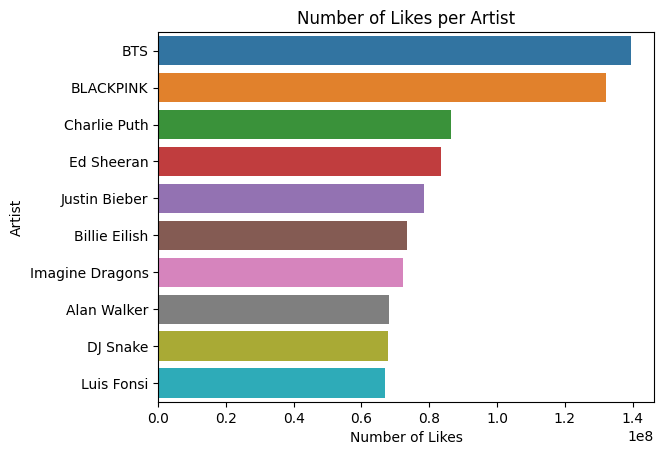

In [29]:
#Verileri sanatçıya göre gruplayın ve ortalama dans edilebilirlik puanını hesaplayın
df_artist_grouped = df_artist.groupby('Artist')['Likes'].sum().reset_index()

#Veriyi dans edilebilirlik puanına göre azalan sırada sıralayın
df_artist_sorted = df_artist_grouped.sort_values(by='Likes', ascending=False)

# Dans edilebilirlik puanı en yüksek olan ilk 10 sanatçıyı seçin
top_10_artists = df_artist_sorted.head(10)

# Seaborn'u kullanarak yatay çubuk grafiği oluşturma
sns.barplot(x='Likes', y='Artist', data=top_10_artists)

# Eksen etiketlerini ve başlığını ayarlayın
plt.xlabel('Number of Likes')
plt.ylabel('Artist')
plt.title('Number of Likes per Artist')

plt.show()

# 5.YouTube Verileri Analizi
**Görüntülenme, Beğeni ve Yorum Analizi**

 Hangi videolar en çok izlenmiş?

In [30]:

# En çok görüntüleme alan ilk 10 videoyu seçiyoruz
  # 'Views' sütununa göre azalan sırada sıralayıp ilk 10 videoyu alıyoruz
top_videos = df.sort_values(by='Views', ascending=False).head(10)

# En popüler videoların başlığını, kanalını ve görüntüleme sayılarını yazdırıyoruz
print(top_videos[['Title', 'Channel', 'Views']].T)

                                           1147   \
Title    Luis Fonsi - Despacito ft. Daddy Yankee   
Channel                            LuisFonsiVEVO   
Views                               8079649362.0   

                                           365    \
Title    Luis Fonsi - Despacito ft. Daddy Yankee   
Channel                            LuisFonsiVEVO   
Views                               8079646911.0   

                                                    12452  \
Title    Ed Sheeran - Shape of You (Official Music Video)   
Channel                                        Ed Sheeran   
Views                                        5908398479.0   

                                                     14580  \
Title    Wiz Khalifa - See You Again ft. Charlie Puth [...   
Channel                                  Wiz Khalifa Music   
Views                                         5773798407.0   

                                                     12469  \
Title    Wiz Khalifa - See

* Görüntülenme ve beğeniler arasındaki ilişki:

<Axes: xlabel='Views', ylabel='Likes'>

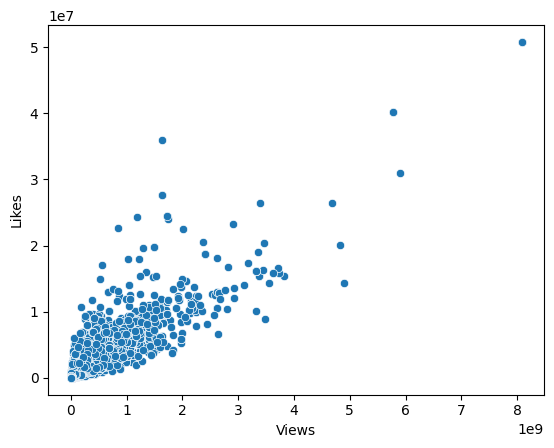

In [31]:
# 'Views' ve 'Likes' arasındaki ilişkiyi görselleştiren bir scatterplot (dağılım) grafiği oluşturuyoruz
sns.scatterplot(data=df, x='Views', y='Likes')

**Kanal Performansı:**
* En yüksek görüntülenme ortalamasına sahip kanallar:

In [32]:
# 'Channel' sütununa göre gruplama yaparak her kanalın ortalama görüntülenme sayısını hesaplıyoruz
# Hesaplanan ortalamaları azalan sırayla sıralayıp ilk 10 kanalın ortalama görüntülenme sayısını alıyoruz
df.groupby('Channel')['Views'].mean().sort_values(ascending=False).head(10)

Channel
Wiz Khalifa Music             3.962261e+09
LuisFonsiVEVO                 3.100360e+09
T-Series Bhakti Sagar         1.550413e+09
Cocomelon - Nursery Rhymes    1.460167e+09
RahatFAKhanVEVO               1.415112e+09
capoVEVO                      1.395119e+09
Major Lazer Official          1.384308e+09
KatyPerryVEVO                 1.247680e+09
Jack Ü                        1.234561e+09
6ix9ineVEVO                   1.199610e+09
Name: Views, dtype: float64

# 6.Spotify ve YouTube Verilerinin Karşılaştırılması**Dinlenme ve Görüntülenme İlişkisi:**:

In [33]:
# Şarkıları sanatçıya ve görüntülemelere göre gruplayın izlenme - youtube, akış - spotify
artist_grouped = df.groupby('Artist')[['Views', 'Stream']].sum()

# Sanatçıları görüntüleme ve akışların toplamına göre azalan düzende sıralayın
artist_sorted = artist_grouped.sort_values(['Views', 'Stream'], ascending=False)

# YouTube'da en çok izlenen ve Spotify'da dinlenen ilk 10 sanatçıyı öğrenin
top_10 = artist_sorted.head(10)

top_10

,Views,Stream
Artist,,
Ed Sheeran,1.546021e+10,1.439488e+10
CoComelon,1.460167e+10,3.690822e+08
Katy Perry,1.312063e+10,6.607329e+09
Charlie Puth,1.216759e+10,7.041187e+09
Luis Fonsi,1.162811e+10,5.054326e+09
Justin Bieber,1.099106e+10,1.209777e+10
Daddy Yankee,1.087193e+10,5.135462e+09
Bruno Mars,1.024092e+10,1.089786e+10
Macklemore & Ryan Lewis,1.012206e+10,3.982978e+09


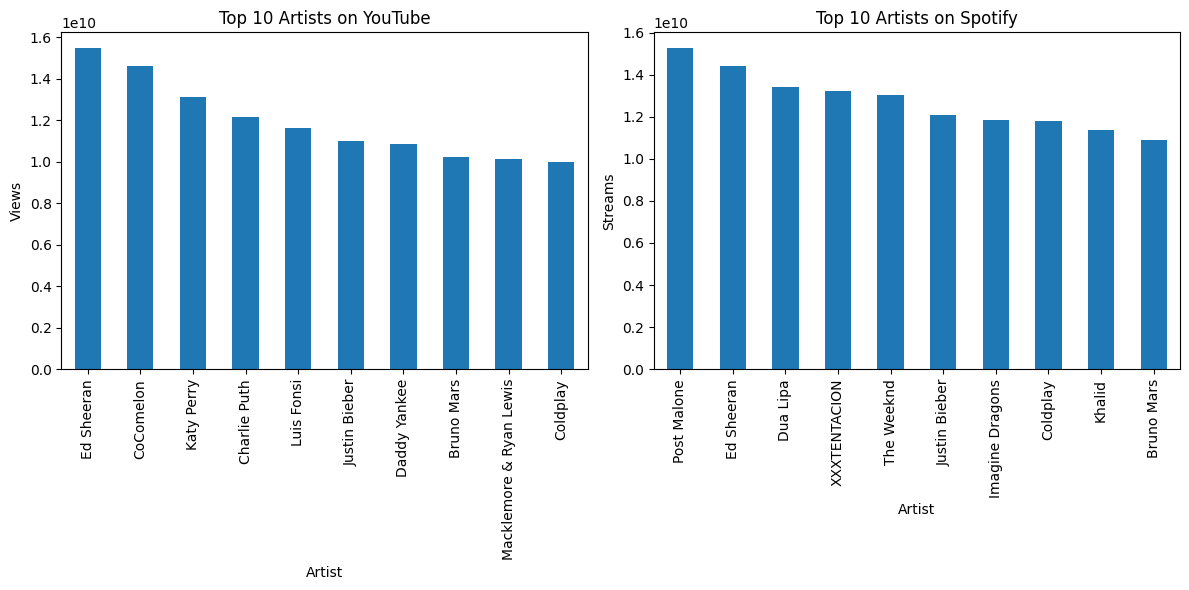

In [34]:
# İzlenme ve akışlar için iki ayrı DataFrame oluşturun
df_views = df.groupby('Artist')['Views'].sum().sort_values(ascending=False)[:10]
df_streams = df.groupby('Artist')['Stream'].sum().sort_values(ascending=False)[:10]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# ilk 10 yt
ax1.set_title('Top 10 Artists on YouTube')
df_views.plot(kind='bar', ax=ax1)

# ilk 10 spotofy
ax2.set_title('Top 10 Artists on Spotify')
df_streams.plot(kind='bar', ax=ax2)

ax1.set_xlabel('Artist')
ax1.set_ylabel('Views')
ax2.set_xlabel('Artist')
ax2.set_ylabel('Streams')
fig.tight_layout()
plt.show()

Ed Sheeran, youtube'da 15 milyara yakın izlenme ile en çok izlenen sanatçı oldu. CoComelon ve Katy Perry sırasıyla 14 milyar ve 13 milyar izlenme ile ikinci ve üçüncü en çok izlenen sanatçılardır. Charlie Puth ve Luis Fonsi sırasıyla 12 milyar ve 11 milyar izlenmeyle ilk beşte yer alıyor.

Spoti dafy Po a Malone 15 milyar ile en çok dinlenen sanatçı oldİkinciusıSırada Ed Shreeran yaklaşık 14 milyar dinlenme var. Dua Lipa ve XXXTENTACION sırasıyla 13,5 milyar ve 13 milyar ile en çok dinlenen üçüncü ve dördüncü sanatçılarT Yhe Weeknd 13 milyar dinlenmeyle beşinci sırada yer alıyor.

Bu rakamlar, bu sanatçıların ve müziklerinin farklı çevrimiçi platformlardaki popülerliğini vurguluyor.

**En Popüler Şarkıların İki Platformdaki Durumu:**

In [35]:

# Spotify ve YouTube için en popüler 10 şarkıyı ve videoyu alıyoruz
top_spotify = df.sort_values(by="Stream", ascending=False).head(10)[['Artist', 'Track', 'Stream']]
top_youtube = df.sort_values(by="Views", ascending=False).head(10)[['Artist', 'Title', 'Views']]

# Platform adını ekliyoruz
top_spotify['Platform'] = 'Spotify'
top_youtube['Platform'] = 'YouTube'

# İki tabloyu birleştiriyoruz
top_combined = pd.concat([top_spotify, top_youtube], ignore_index=True)

# Eksik değerleri daha düzgün göstermek için boş yerleri '-' ile dolduruyoruz
top_combined = top_combined.fillna('-')

# Tabloyu yazdırıyoruz
print(top_combined.to_markdown(index=False))

| Artist           | Track                                         | Stream       | Platform   | Title                                                                              | Views        |
|:-----------------|:----------------------------------------------|:-------------|:-----------|:-----------------------------------------------------------------------------------|:-------------|
| The Weeknd       | Blinding Lights                               | 3386520288.0 | Spotify    | -                                                                                  | -            |
| Ed Sheeran       | Shape of You                                  | 3362005201.0 | Spotify    | -                                                                                  | -            |
| Lewis Capaldi    | Someone You Loved                             | 2634013335.0 | Spotify    | -                                                                                  | -            |
| Post Malone  

In [36]:
# İzlenme sayısına göre en iyi 10 şarkı
top10_views = df.nlargest(10, 'Views')

# Yorum sayısına göre en iyi 10 şarkı
top10_comments = df.nlargest(10, 'Comments')

# Beğenme sayısına göre en iyi 10 şarkı
top10_likes = df.nlargest(10, 'Likes')

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


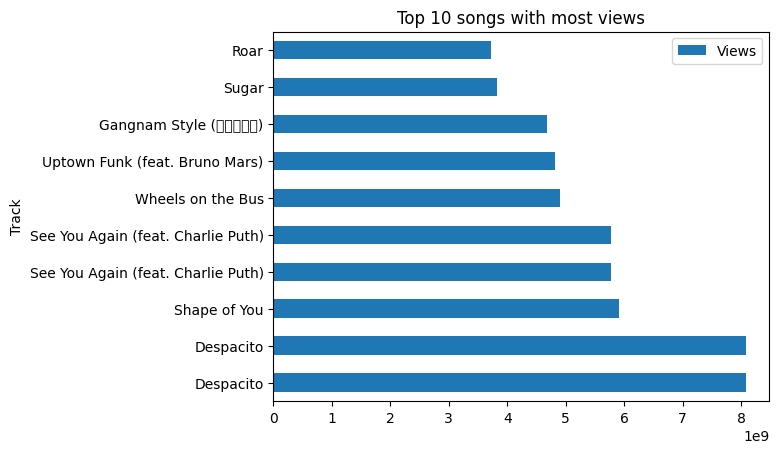

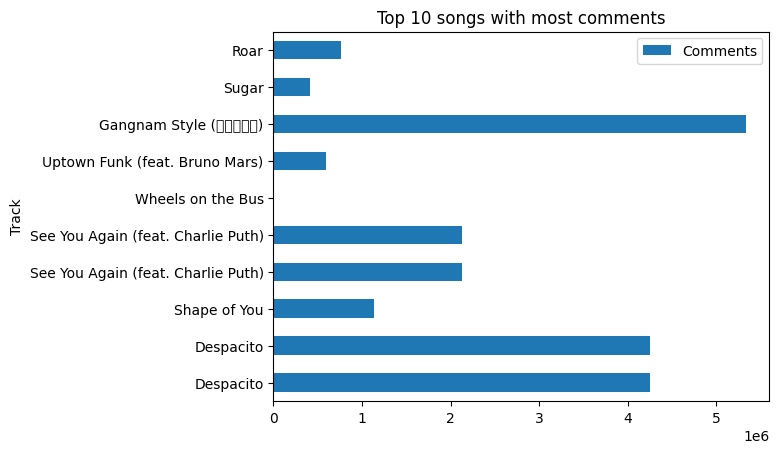

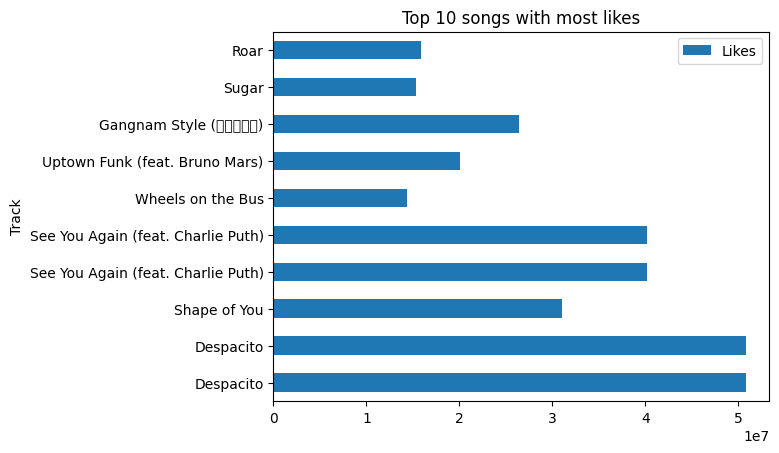

In [37]:
# En çok izlenen ilk 10 şarkı
top10_views.plot(kind='barh', x='Track', y='Views', title='Top 10 songs with most views')

# En çok yorum alan ilk 10 şarkı
top10_views.plot(kind='barh', x='Track', y='Comments', title='Top 10 songs with most comments')

# En çok beğeni alan ilk 10 şarkı
top10_views.plot(kind='barh', x='Track', y='Likes', title='Top 10 songs with most likes')
plt.show()

Görüldüğü gibi Despacito en çok beğenilen, izlenen ve yorumlanan müzik olup 80 milyon kişi tarafından beğenilmiş ve 50 milyon kişi tarafından beğenilmiştir. 

*  İki platformdaki ortak şarkıları bulur ve listeler:

In [38]:

# Ortak şarkıları bulma ve Stream ile Views arasında karşılaştırma yapma
common_songs = df[df['Track'] == df['Title']]

#NaN Değerlerini Kaldırma: dropna() ile Stream ve Views değerlerinden NaN (eksik) olanları kaldırıyoruz. 
#Bu işlem, karşılaştırmaların doğru yapılabilmesi için önemlidir.
common_songs = common_songs.dropna(subset=['Stream', 'Views'])

# Platform karşılaştırması yapıyoruz
common_songs['Platform'] = common_songs.apply(
    lambda row: 'Spotify' if row['Stream'] > row['Views'] else 'YouTube' if row['Stream'] < row['Views'] else 'Equal',
    axis=1
)

# Sonuçları yazdırma
print(common_songs[['Artist', 'Track', 'Stream', 'Views', 'Platform']])

                  Artist                           Track       Stream  \
42              Coldplay                          Sparks  475353044.0   
74             Radiohead         Exit Music (For A Film)  146857863.0   
138    Pharrell Williams               Just A Cloud Away  105629259.0   
334           Kanye West   Father Stretch My Hands Pt. 1  627167330.0   
336           Kanye West                        I Wonder  302891517.0   
...                  ...                             ...          ...   
20713        SICK LEGEND            JUST DANCE HARDSTYLE    9227144.0   
20714        SICK LEGEND  SET FIRE TO THE RAIN HARDSTYLE   10898176.0   
20715        SICK LEGEND       OUTSIDE HARDSTYLE SPED UP    6226110.0   
20716        SICK LEGEND             ONLY GIRL HARDSTYLE    6873961.0   
20717        SICK LEGEND              MISS YOU HARDSTYLE    5695584.0   

            Views Platform  
42     73201019.0  Spotify  
74     10644157.0  Spotify  
138     2672481.0  Spotify  
334    

Bu tablodan iki platformadi aynı şarkıların stream ve views değerleri vardır.Son kolonda ise her bir şarkının Stream ve Views değerlerini karşılaştırıyoruz. Eğer Stream sayısı büyükse, şarkı Spotify'da daha fazla izlenmiş olarak etiketleniyor. Eğer Views sayısı büyükse, şarkı YouTube'da daha fazla izlenmiş olarak etiketleniyor. Eğer her ikisi eşitse, "Equal" olarak işaretleniyor.

Şarkıları Enerji ve Dans Edilebilirlik temelinde analiz etme

In [39]:
top_songs = df.sort_values('Stream', ascending=False).head(10)
top_songs[['Track', 'Energy', 'Danceability', 'Acousticness']]

,Track,Energy,Danceability,Acousticness
15250,Blinding Lights,0.730,0.514,0.00146
12452,Shape of You,0.652,0.825,0.58100
19186,Someone You Loved,0.405,0.501,0.75100
17937,rockstar (feat. 21 Savage),0.520,0.585,0.12400
17445,Sunflower - Spider-Man: Into the Spider-Verse,0.522,0.755,0.53300
17938,Sunflower - Spider-Man: Into the Spider-Verse,0.522,0.755,0.53300
13503,One Dance,0.625,0.792,0.00776
16099,Closer,0.524,0.748,0.41400
16028,Closer,0.524,0.748,0.41400
14030,Believer,0.780,0.776,0.06220


# 7.Görselleştirme**Şarkıların Danceability ve Valence Dağılımı:**:

/tmp/ipykernel_17/1059671960.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Album_type', y='Danceability', ci=None)  # Danceability ortalamaları için sütun grafiği


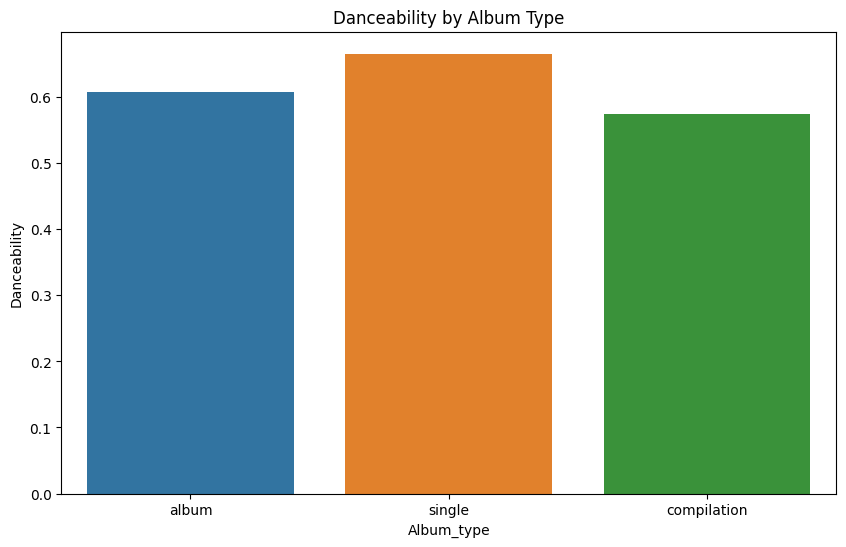

/tmp/ipykernel_17/1059671960.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Album_type', y='Valence', ci=None)  # Valence ortalamaları için sütun grafiği


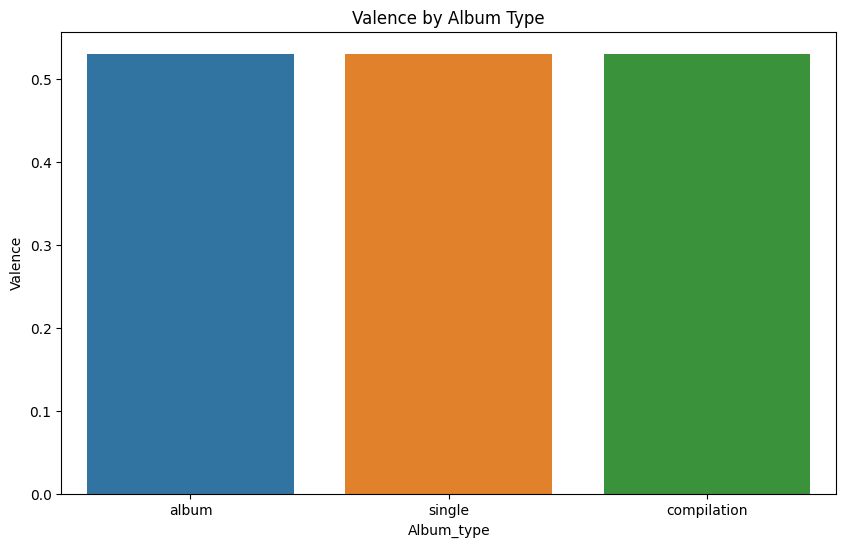

In [40]:
# 'Album_type' kategorisine göre 'Danceability' ve 'Valence' değerlerinin ortalamalarını içeren sütun grafikleri oluşturuluyor
plt.figure(figsize=(10, 6))  # Grafik boyutu ayarlanıyor
sns.barplot(data=df, x='Album_type', y='Danceability', ci=None)  # Danceability ortalamaları için sütun grafiği
plt.title("Danceability by Album Type")  # Başlık ekleniyor
plt.show()

plt.figure(figsize=(10, 6))  # Grafik boyutu ayarlanıyor
sns.barplot(data=df, x='Album_type', y='Valence', ci=None)  # Valence ortalamaları için sütun grafiği
plt.title("Valence by Album Type")  # Başlık ekleniyor
plt.show()

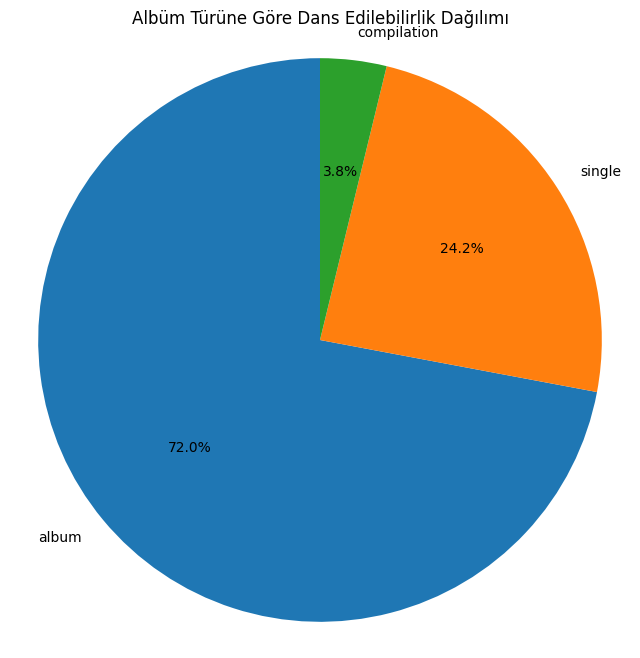

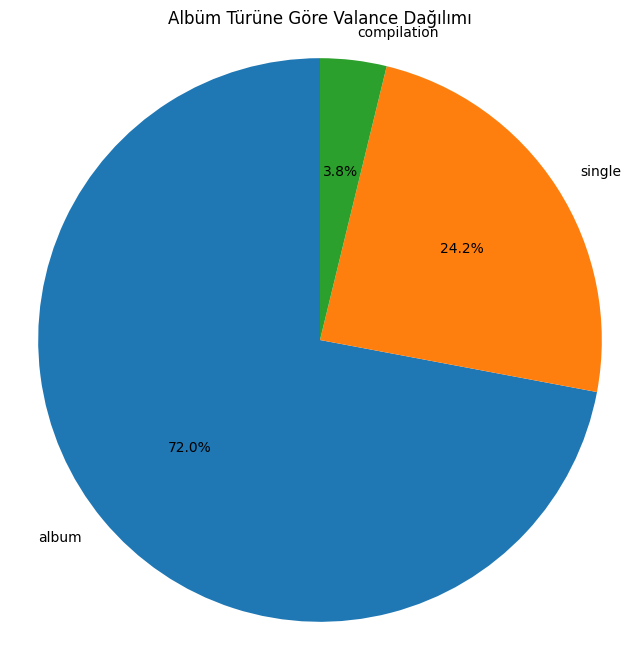

In [41]:
# 'Album_type' kategorisi için Danceability yüzdelik dağılımını gösteren yuvarlak grafik
danceability_counts = df['Album_type'].value_counts()  # 'Album_type' kategorisinin frekanslarını alıyoruz
plt.figure(figsize=(8, 8))  # Grafik boyutunu ayarlıyoruz
plt.pie(danceability_counts, labels=danceability_counts.index, autopct='%1.1f%%', startangle=90)  # Pie chart oluşturuluyor
plt.title("Albüm Türüne Göre Dans Edilebilirlik Dağılımı")  # Başlık ekleniyor
plt.axis('equal')  # Daire şekli için eşit eksen oranı
plt.show()

# 'Album_type' kategorisi için Valence yüzdelik dağılımını gösteren yuvarlak grafik
valence_counts = df['Album_type'].value_counts()  # 'Album_type' kategorisinin frekanslarını alıyoruz
plt.figure(figsize=(8, 8))  # Grafik boyutunu ayarlıyoruz
plt.pie(valence_counts, labels=valence_counts.index, autopct='%1.1f%%', startangle=90)  # Pie chart oluşturuluyor
plt.title("Albüm Türüne Göre Valance Dağılımı")  # Başlık ekleniyor
plt.axis('equal')  # Daire şekli için eşit eksen oranı
plt.show()

# 8.Popülerlik Endeksi (Popularity Index)
YouTube ve Spotify'daki popülerlik endekslerini karşılaştırarak, içeriklerin hangi platformda daha fazla rağbet gördüğünü belirleyebiliriz.

In [42]:

# Ağırlıkları tanımlıyoruz
w1 = 0.5  # Views'in ağırlığı
w2 = 0.3  # Likes'in ağırlığı
w3 = 0.2  # Comments'in ağırlığı
w4 = 0.6  # Stream'in ağırlığı
w5 = 0.4  # Likes'in ağırlığı (Spotify için)
# Popülerlik Endekslerini hesaplayalım
common_songs.loc[:, 'YouTube_Popularity'] = (common_songs['Views'] * w1) + (common_songs['Likes'] * w2) + (common_songs['Comments'] * w3)
common_songs.loc[:, 'Spotify_Popularity'] = (common_songs['Stream'] * w4) + (common_songs['Likes'] * w5)

# Her şarkının hangi platformda daha popüler olduğunu ekleyelim
common_songs.loc[:, 'Platform_With_Higher_Popularity'] = common_songs.apply(
    lambda row: 'YouTube' if row['YouTube_Popularity'] > row['Spotify_Popularity'] else 'Spotify', axis=1)

# Sonuçları görüntüleyelim
print(common_songs[['Artist', 'Track', 'YouTube_Popularity', 'Spotify_Popularity', 'Platform_With_Higher_Popularity']])


                  Artist                           Track  YouTube_Popularity  \
42              Coldplay                          Sparks          36837039.8   
74             Radiohead         Exit Music (For A Film)           5373808.9   
138    Pharrell Williams               Just A Cloud Away           1355175.0   
334           Kanye West   Father Stretch My Hands Pt. 1          23781425.3   
336           Kanye West                        I Wonder           6874571.6   
...                  ...                             ...                 ...   
20713        SICK LEGEND            JUST DANCE HARDSTYLE             36172.9   
20714        SICK LEGEND  SET FIRE TO THE RAIN HARDSTYLE             82976.2   
20715        SICK LEGEND       OUTSIDE HARDSTYLE SPED UP             17921.7   
20716        SICK LEGEND             ONLY GIRL HARDSTYLE              3292.9   
20717        SICK LEGEND              MISS YOU HARDSTYLE             80093.7   

       Spotify_Popularity Platform_With

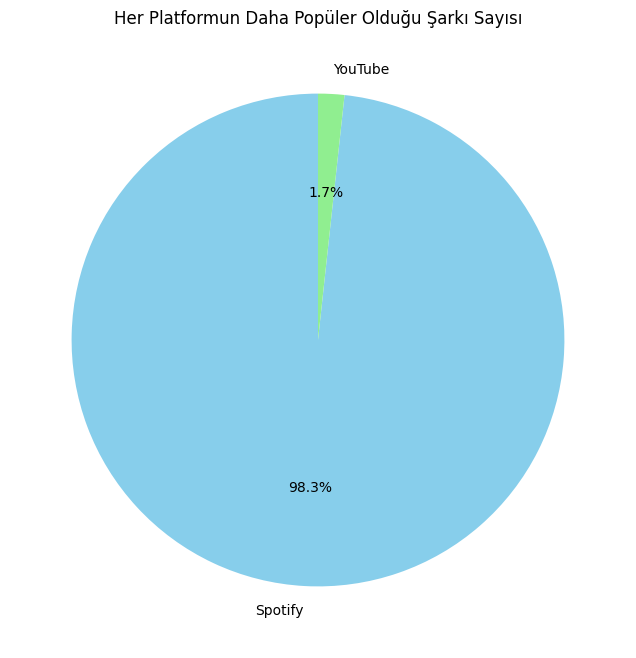

In [43]:
# Platform sayısını hesaplama
platform_counts = common_songs['Platform_With_Higher_Popularity'].value_counts()

# Pasta grafiği oluşturma
platform_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8), colors=['skyblue', 'lightgreen'])

plt.title('Her Platformun Daha Popüler Olduğu Şarkı Sayısı')
plt.ylabel('')  # Y ekseni etiketini kaldır
plt.show()

Bu grafikten te anladığımız üzere şarkılar spotifyda daha popüler ve daha çok dinlenme alıyor.

Veri setindeki şarkıların belirli özelliklerini ("Energy", "Danceability", "Acousticness") karşılaştıralım ve bunları bir çubuk grafikle görselleştirelim.

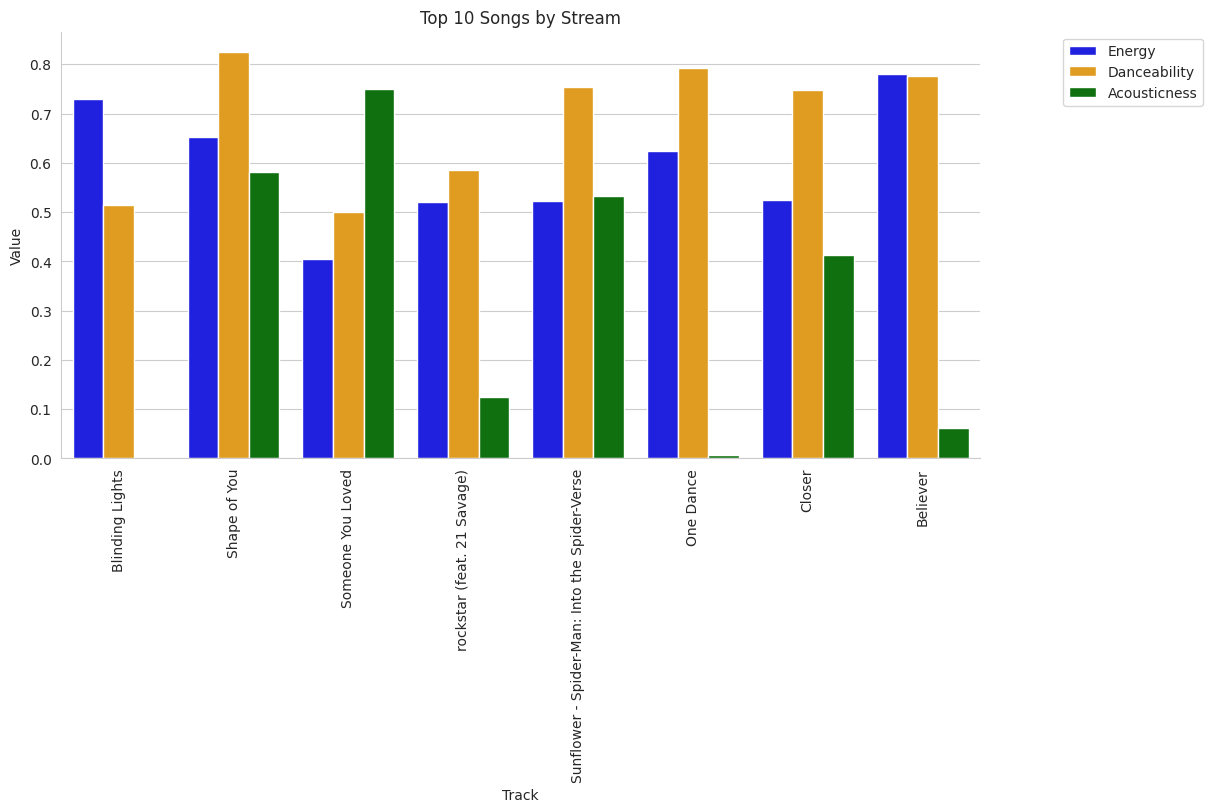

In [44]:
top_songs_melt = top_songs.melt(id_vars=['Track'], value_vars=['Energy', 'Danceability', 'Acousticness'],
                                var_name='Attribute', value_name='Value')

sns.set_style('whitegrid')
sns.catplot(x='Track', y='Value', hue='Attribute', data=top_songs_melt, kind='bar',
            palette={'Energy': 'blue', 'Danceability': 'orange', 'Acousticness': 'green'},
            aspect=2, legend=False)


plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title('Top 10 Songs by Stream')
plt.xlabel('Track')
plt.ylabel('Value')

plt.xticks(rotation=90)
plt.show()

Dans ritimleri ve enerjisi yüksek şarkılar insanlar arasında daha popüler.